# Домашняя работа

## Григоренко Владислав

### 5 - Всё вместе + SciPy

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def cube_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [16]:
x_points = np.linspace(-4, 4, 500)
y_points = np.array([cube_func(x, 1.0, 2.0, -3.0, 2.0) for x in x_points])
y_points_noise = np.array([cube_func(x, 1.0, 2.0, -3.0, 2.0) + np.random.normal(0, 10) for x in x_points])

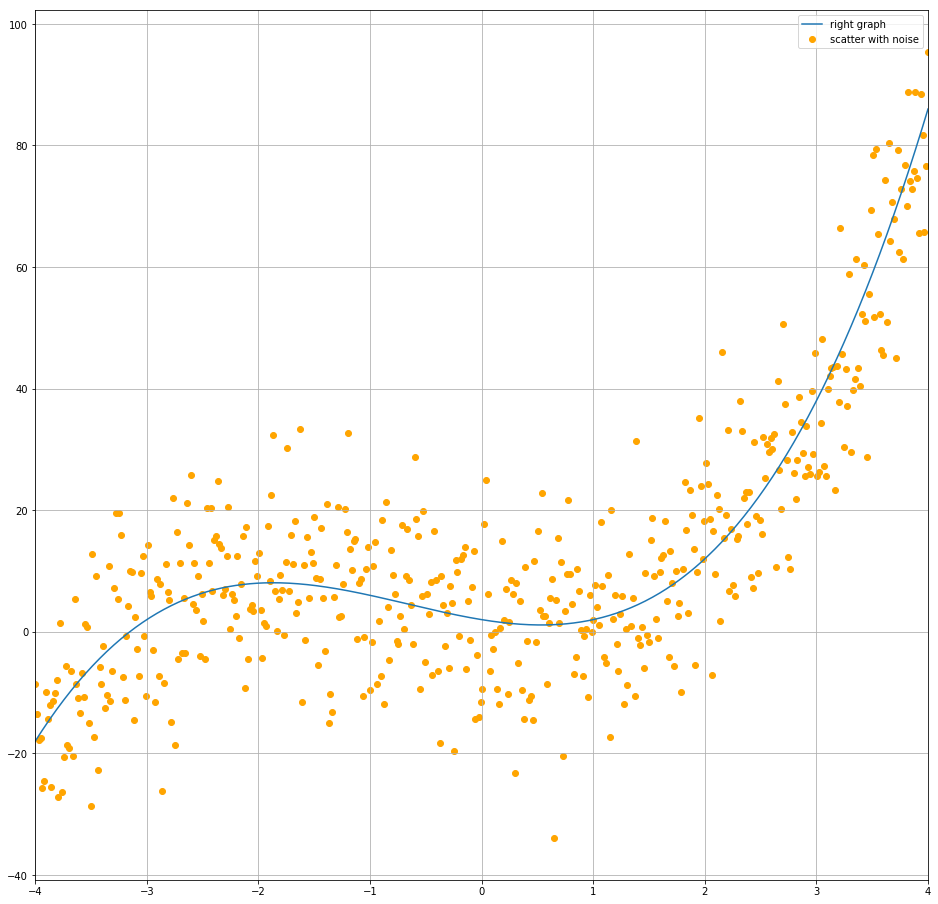

In [17]:
plt.figure(figsize = (16, 16))
plt.plot(x_points, y_points, label = "right graph")
plt.scatter(x_points, y_points_noise, color = "orange", label = "scatter with noise")
plt.grid()
plt.xlim(-4, 4)
plt.legend()
plt.show()

In [18]:
np.polyfit(x_points, y_points, 3)

array([ 1.,  2., -3.,  2.])

In [19]:
np.polyfit(x_points, y_points_noise, 3)

array([ 0.98709371,  1.83907089, -3.16700168,  2.56918072])

In [20]:
from scipy.optimize import curve_fit

coef, _ = curve_fit(cube_func, x_points, y_points_noise)
coef

array([ 0.98709371,  1.83907091, -3.16700165,  2.56918069])

In [21]:
def new_cube_func(x, coeffisients):
    return x**3 * coeffisients[0] + x**2 * coeffisients[1] + x * coeffisients[2] + coeffisients[3]

In [22]:
def cube_func_x(x):
    return new_cube_func(x, coef)

In [23]:
def otr_cube_func_x(x):
    return (-1) * cube_func_x(x) 

In [24]:
new_y_points = np.array([new_cube_func(x, coef) for x in x_points])

In [25]:
from scipy.optimize import minimize

rez1 = minimize(cube_func_x, 2).x
print(rez1[0], "\t\t", cube_func_x(rez1[0]))
rez2 = minimize(otr_cube_func_x, -3).x
print(rez2[0], "\t\t", cube_func_x(rez2[0]))

0.585260962022 		 1.54347828267
-1.82733895184 		 8.47429260745


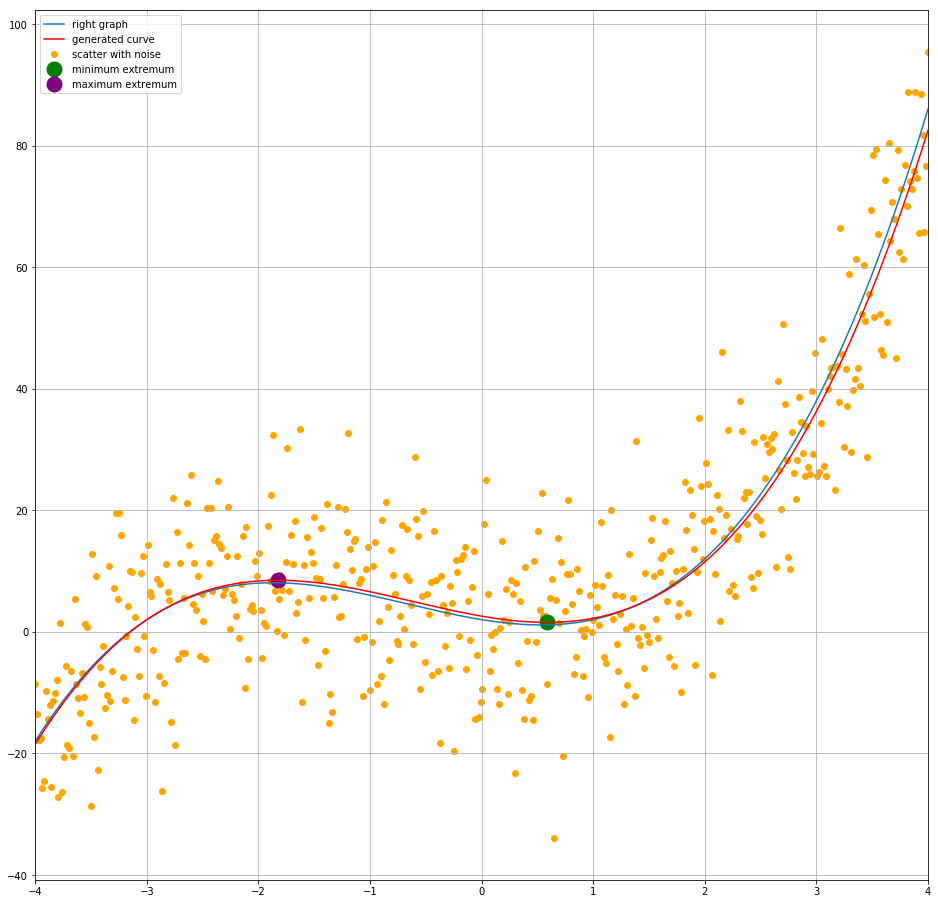

In [26]:
plt.figure(figsize = (16, 16))
plt.plot(x_points, y_points, label = "right graph")
plt.plot(x_points, new_y_points, color = "red", label = "generated curve")
plt.scatter(x_points, y_points_noise, color = "orange", label = "scatter with noise")
plt.scatter(rez1[0], cube_func_x(rez1[0]), color = "green", linewidth = 10, label = "minimum extremum")
plt.scatter(rez2[0], cube_func_x(rez2[0]), color = "purple", linewidth = 10, label = "maximum extremum")
plt.grid()
plt.xlim(-4, 4)
plt.legend()
plt.show()

______________________________